In [28]:
%load_ext autoreload
%autoreload 2
import sys
import os

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import _pickle as cPickle
import json

sys.path.insert(1, '/home/kbrennan/cell_tracker/')
from cell_tracker import Cell, filter_cells_lifespan, remove_dublicate_cells

sys.path.insert(1, '/home/kbrennan/phd/scripts')

import plotting.plot_utils as pu
pu.figure_setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
root = '/home/kbrennan/phd/data/case_20210628/tracks_new'
member = '000'

path_json = os.path.join(root, f'cell_tracks_{member}.json')
path_pickle = os.path.join(root, f'cells_{member}.pickle')

with open(path_json, 'r') as f:
    data_j = json.load(f)

with open(path_pickle, 'rb') as f:
    cells = cPickle.load(f)

cells_j = data_j['cell_data']

In [38]:
for cell in cells:
    cell.append_associates(cells)

In [39]:
longlived = filter_cells_lifespan(cells, 2.5*60)

In [40]:
for cell in longlived:
    cell.append_associates(cells)

In [41]:
len(longlived)

80

In [42]:
filtered = remove_dublicate_cells(longlived)

In [43]:
len(filtered)

22

(121.35396341463414, 999.066768292683, 83.52370689655172, 792.5021551724137)

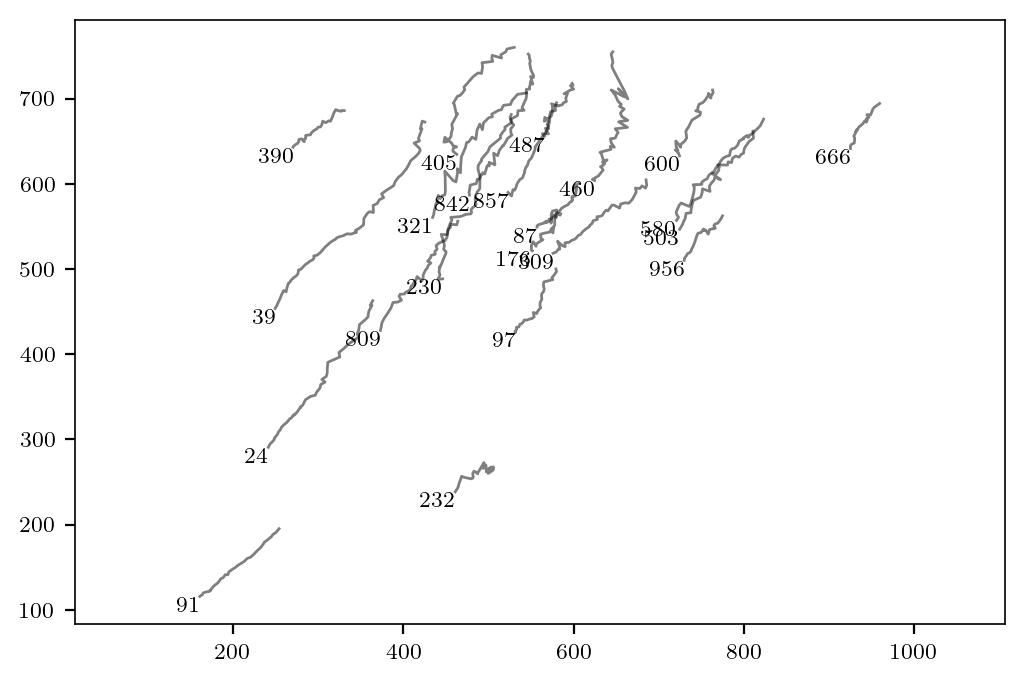

In [44]:
for cell in filtered:
    if cell.cell_id == 962: # 000,51  004,962  
        color = 'r'
    else:
        color = 'k'
    plt.plot(cell.mass_center_y, cell.mass_center_x, color, alpha=0.5)
    plt.text(cell.mass_center_y[0], cell.mass_center_x[0], cell.cell_id, horizontalalignment='right', verticalalignment='top', fontsize=8)

# equal aspect ratio
plt.axis('equal')